The dataset we will be using is a Spotify popularity dataset from https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

We are going to do a regression model to predict danceability

In [1]:
import pandas as pd
data = pd.read_csv("dataset.csv")
data= data.drop(data.columns[0], axis=1)
display(data)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


We will remove all text columns since they are unnecessary for our regression problem. We can use explicit by converting false and true to 0 and 1. we could use the same technique on track_genre but to save time we wont

In [2]:
data= data.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])
display(data)
data['explicit'] = data['explicit'].astype(int)
display(data['explicit'])

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


0         0
1         0
2         0
3         0
4         0
         ..
113995    0
113996    0
113997    0
113998    0
113999    0
Name: explicit, Length: 114000, dtype: int32

Next we will check for missing values

In [3]:
missing_values_percentage = data.isnull().mean() * 100
display(missing_values_percentage)

popularity          0.0
duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
dtype: float64

We barely have any NaN values, so we can just drop the rows that have them

In [4]:
data.dropna()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


Now that we're dealing with numerical values only, we will normalize them to get rid of different scales. We will keep the popularity values as is since we wish to predict them.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
selected_columns= ['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Fit and transform the selected columns
data[selected_columns] = scaler.fit_transform(data[selected_columns])

In [6]:
statistics = data.describe()
display(statistics)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.332385,0.043539,0.085500,0.575432,0.641383,5.309140,0.763406,0.637553,0.087722,0.316175,0.156050,0.213553,0.476450,0.501898,3.904035
std,0.223051,0.020487,0.279626,0.176185,0.251529,3.559987,0.093027,0.480709,0.109567,0.333858,0.309555,0.190378,0.260564,0.123178,0.432621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,0.033236,0.000000,0.462944,0.472000,2.000000,0.730962,0.000000,0.037202,0.016968,0.000000,0.098000,0.261307,0.407684,4.000000
50%,0.350000,0.040652,0.000000,0.588832,0.685000,5.000000,0.786619,1.000000,0.050674,0.169679,0.000042,0.132000,0.466332,0.501360,4.000000
75%,0.500000,0.049932,0.000000,0.705584,0.854000,8.000000,0.823632,1.000000,0.087565,0.600402,0.049000,0.273000,0.686432,0.575543,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


Having preprocessed our data, we'll save it in a csv file to use it in other stages of the project

In [7]:
data.to_csv('processed_dataset.csv', index=False)

# Visualisation

Here we are visualizing the frequency of values per column

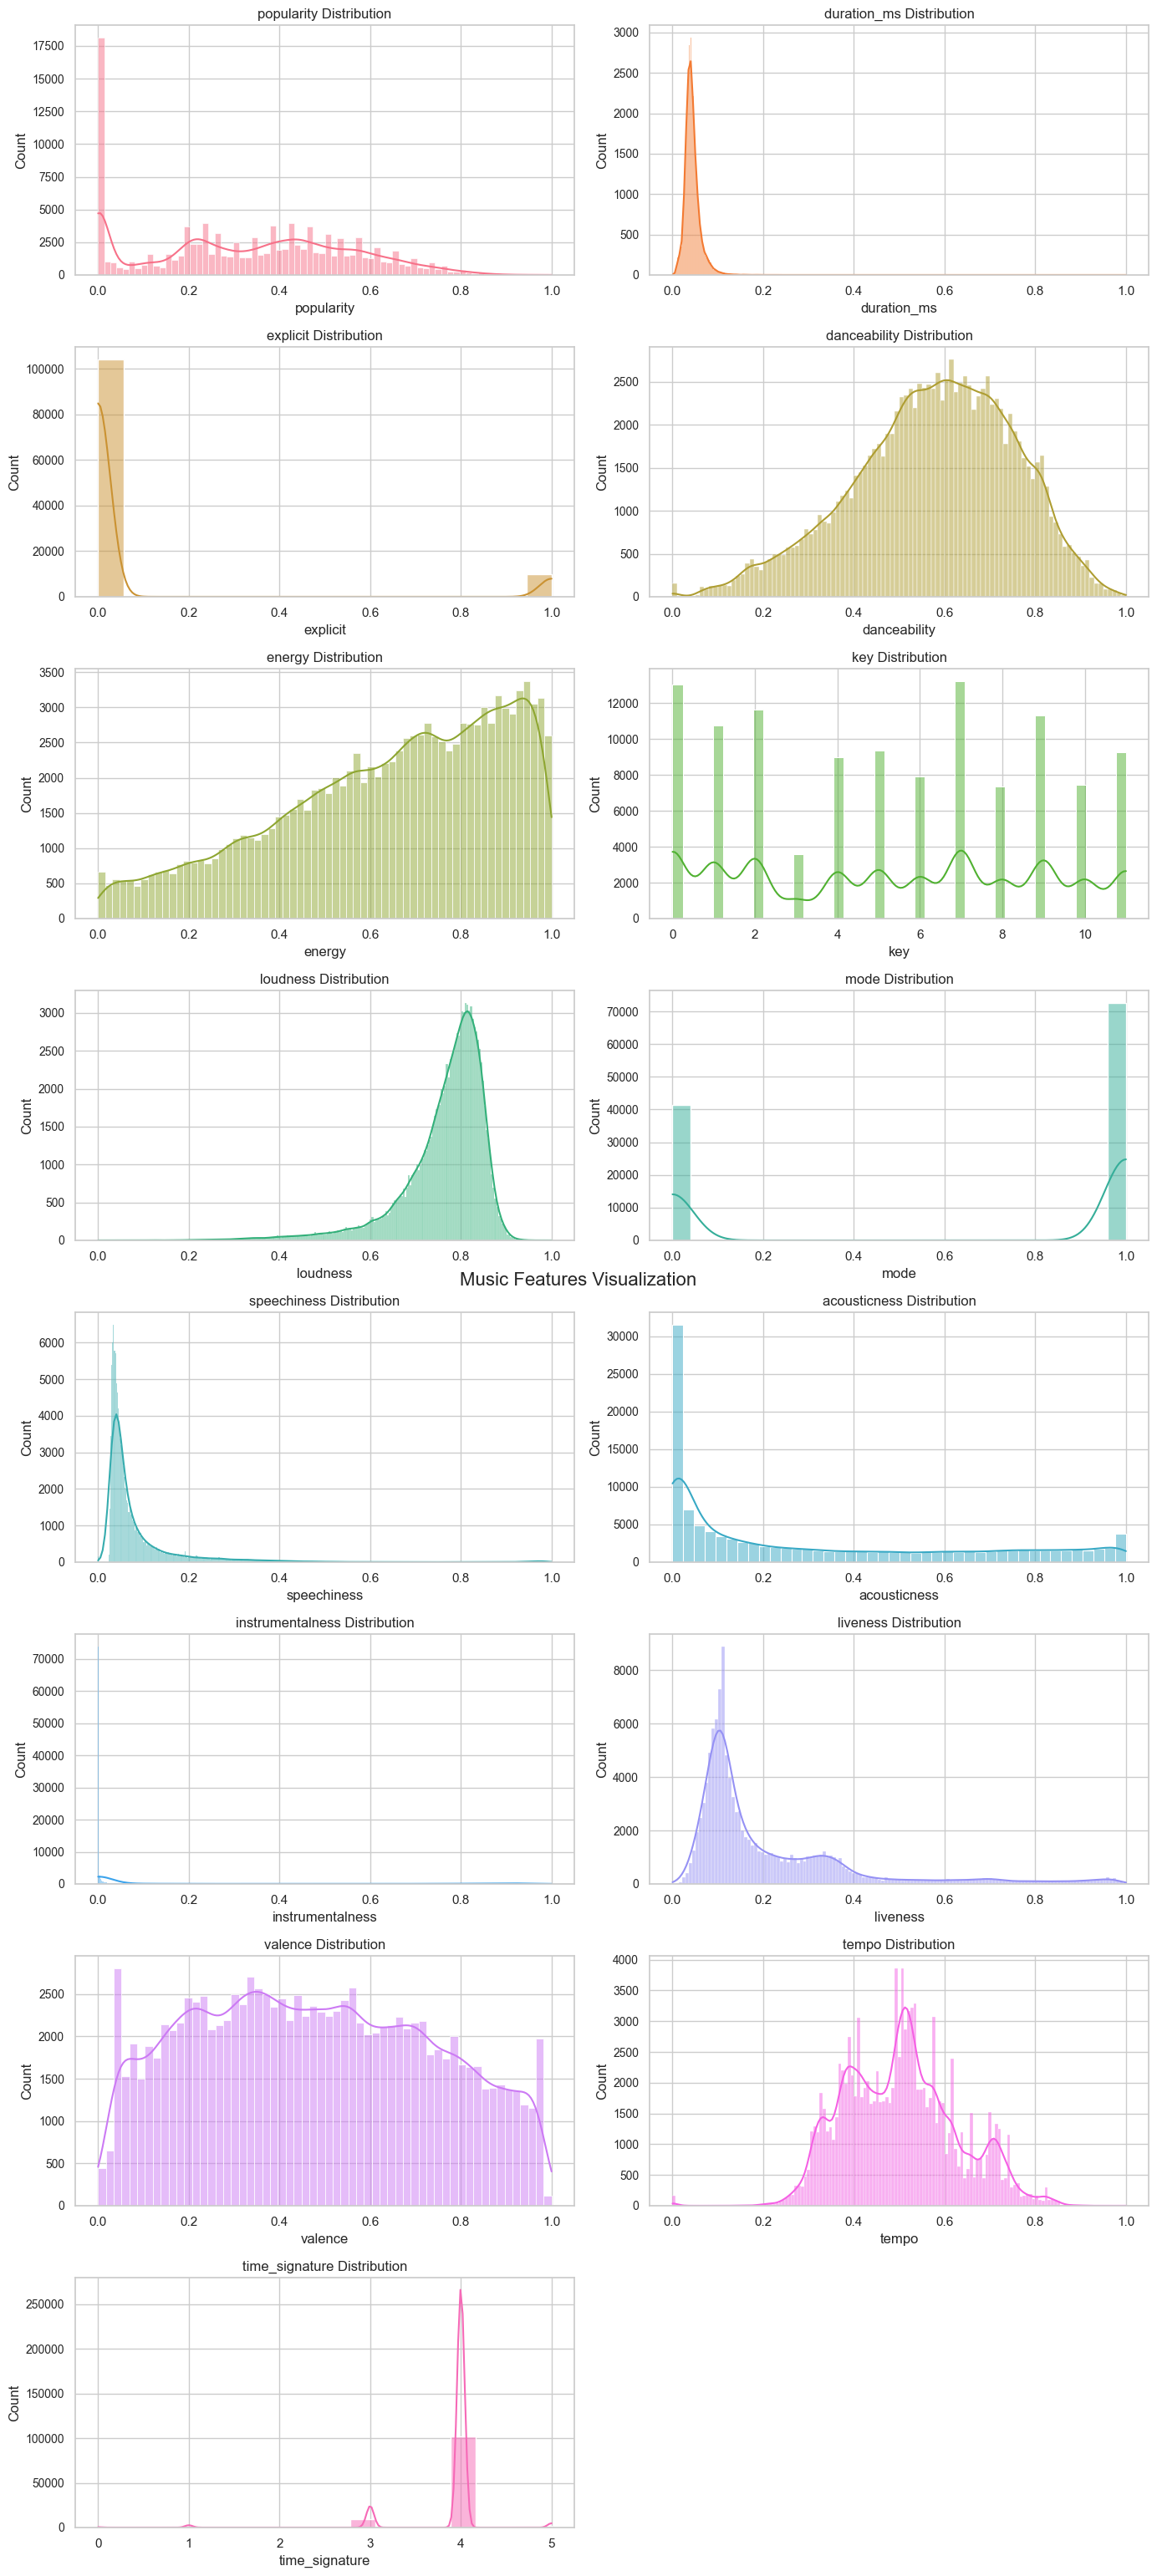

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the style for seaborn
sns.set(style="whitegrid")

# Get the list of numeric columns (excluding 'popularity')
numeric_columns = data.columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
num_cols = 2

# Create a figure and axis
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 2 * num_rows))
fig.suptitle('Music Features Visualization', fontsize=16)

# Generate random colors
random_colors = sns.color_palette('husl', n_colors=len(numeric_columns))

# Plot histograms for each numeric column with random colors
for i, col in enumerate(numeric_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    sns.histplot(data[col], kde=True, ax=axes[row_idx, col_idx], color=random_colors[i])
    axes[row_idx, col_idx].set_title(f'{col} Distribution')
    
    # Increase y-axis tick label font size
    axes[row_idx, col_idx].tick_params(axis='y', labelsize=10)

# If there's an odd number of columns, remove the empty subplot in the last row and last column
if len(numeric_columns) % num_cols == 1:
    fig.delaxes(axes[-1, -1])

# Adjusting layout
plt.tight_layout(rect=[0, 0, 1, 1.96])
plt.show()

Here we're trying to figure out which features impacts popularity the most by making a correlation ranking to analyze the correlation between the 'popularity' column and other numeric columns in the DataFrame. 

Correlation ranking provides a ranked list of these correlations, allowing users to quickly identify which numeric features are most strongly correlated (positively or negatively) with the 'popularity' column.

In [9]:
def danceability_correlation_ranking(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Get the correlation with 'popularity' and sort the values
    danceability_correlation = correlation_matrix['danceability'].sort_values(ascending=False)

    # Print the ranked list
    print("danceability Correlation Ranking:")
    print(danceability_correlation)

    # Return the ranked list
    return danceability_correlation

# Assuming 'df' is your DataFrame
ranking = danceability_correlation_ranking(data)


danceability Correlation Ranking:
danceability        1.000000
valence             0.477341
loudness            0.259077
time_signature      0.207218
energy              0.134325
explicit            0.122507
speechiness         0.108626
key                 0.036469
popularity          0.035448
tempo              -0.050450
mode               -0.069219
duration_ms        -0.073426
liveness           -0.131617
acousticness       -0.171533
instrumentalness   -0.185606
Name: danceability, dtype: float64


We have some good positive values, the biggest of which is "valence  0.477341"